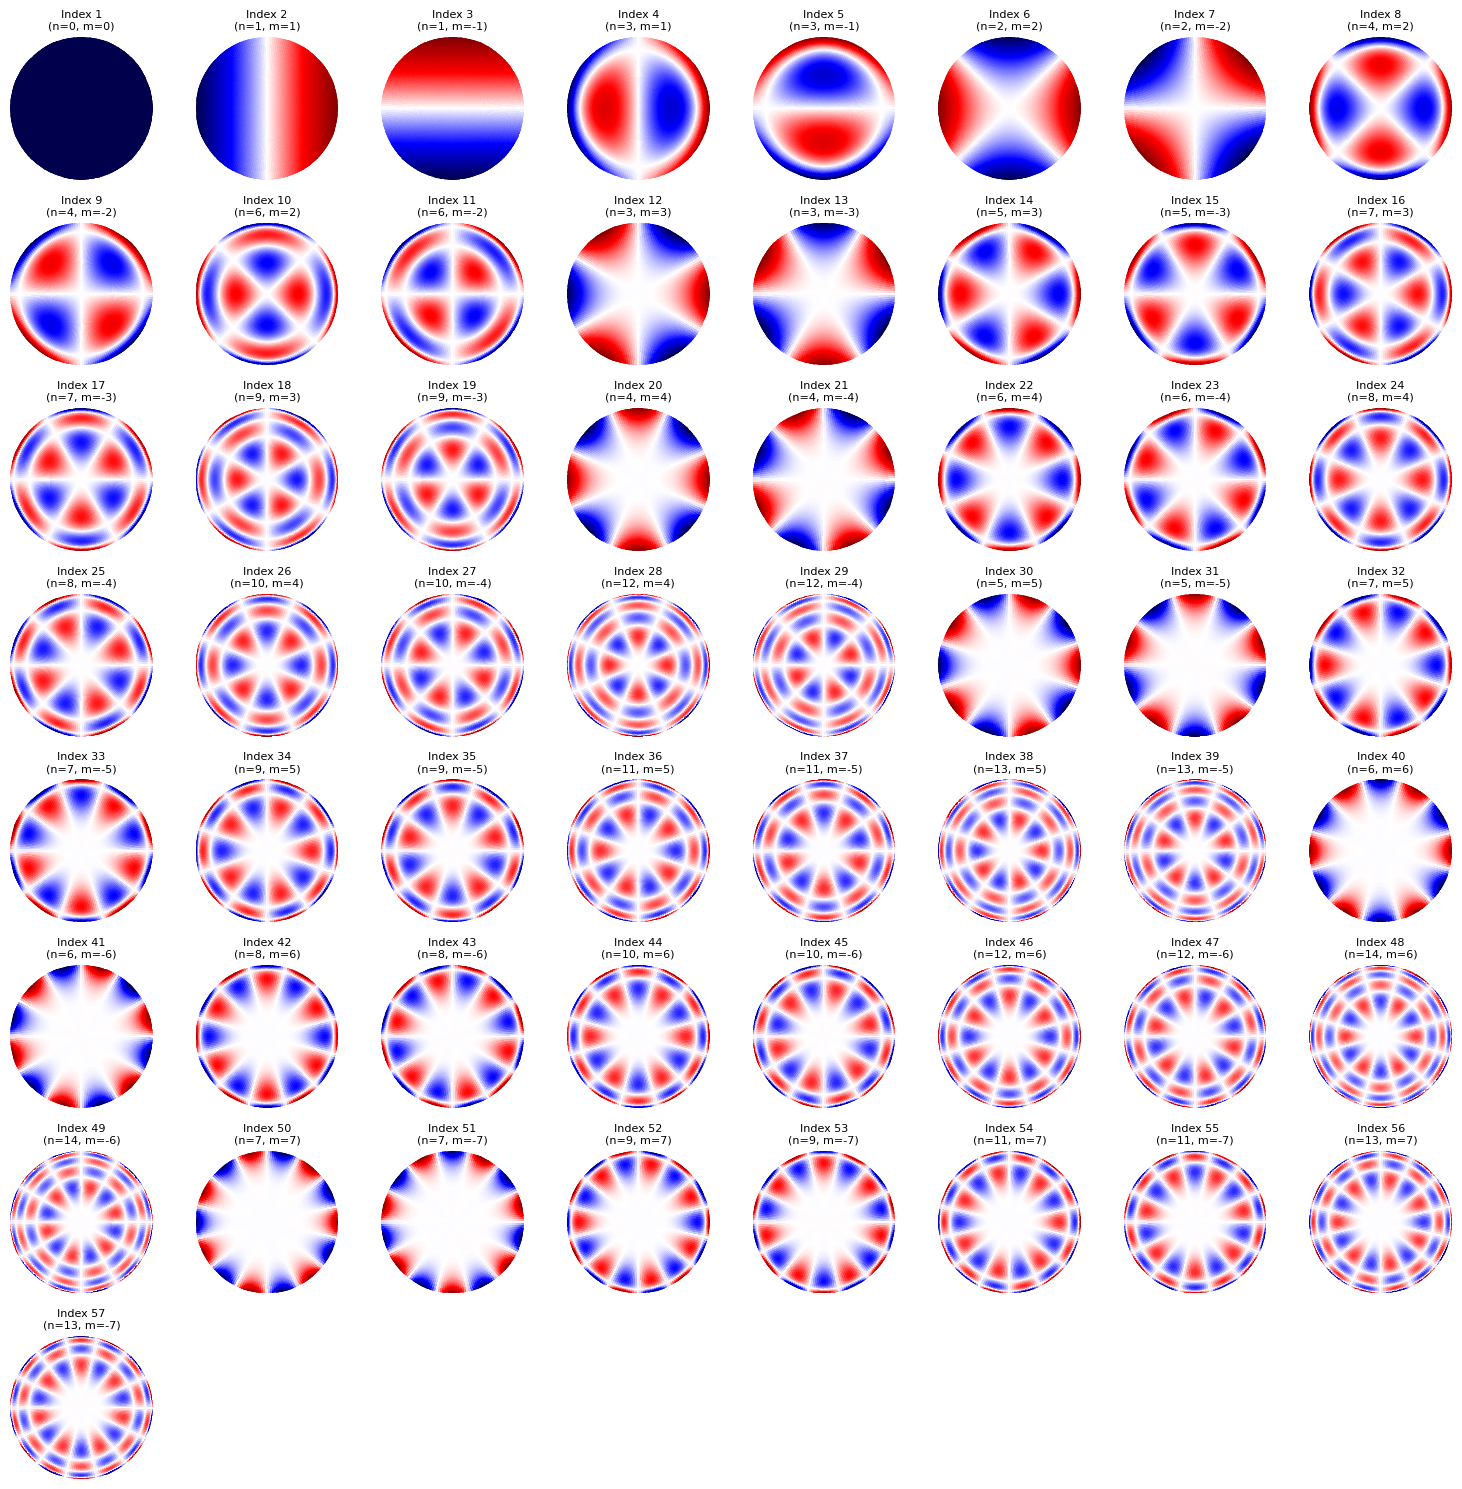

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm

def zernike_radial(n, m, r):
    """
    Zernike 방사 함수 계산
    n: 방사차수
    m: 각차수
    r: 반지름 배열 (0 <= r <= 1)
    """
    R = np.zeros_like(r)
    for k in range((n - abs(m)) // 2 + 1):
        coef = (-1)**k * np.math.factorial(n - k) / (
            np.math.factorial(k) *
            np.math.factorial((n + abs(m)) // 2 - k) *
            np.math.factorial((n - abs(m)) // 2 - k)
        )
        R += coef * r**(n - 2 * k)
    return R

def zernike(n, m, r, theta):
    """
    Zernike 다항식 계산
    n: 방사차수
    m: 각차수
    r: 반지름 배열
    theta: 각도 배열
    """
    R = zernike_radial(n, m, r)
    if m > 0:
        return R * np.cos(m * theta)
    elif m < 0:
        return R * np.sin(-m * theta)
    else:
        return R

def fringe_zernike_index(index):
    """
    Fringe Zernike 인덱스에 따른 (n, m) 값 반환
    """
    # Fringe Zernike 인덱스 테이블 생성
    fringe_table = []
    ind = 1
    for m in range(0, 8):  # m 값은 0부터 7까지
        for k in range(0, m + 1):
            n = m + 2 * k
            if n > 14:  # n 값이 최대 14까지 (인덱스 64에 해당)
                continue
            # m이 0이면 한 번만 추가
            if m == 0:
                fringe_table.append((ind, n, m))
                ind += 1
            else:
                # cos(mθ)
                fringe_table.append((ind, n, m))
                ind += 1
                # sin(mθ)
                fringe_table.append((ind, n, -m))
                ind += 1
            if ind > 64:
                break
        if ind > 64:
            break
    # 인덱스에 해당하는 (n, m) 반환
    for idx, n_val, m_val in fringe_table:
        if idx == index:
            return n_val, m_val
    return None, None

# 단위 원판 내에서 r과 theta 생성
resolution = 200
rho = np.linspace(0, 1, resolution)
phi = np.linspace(0, 2 * np.pi, resolution)
rho_grid, phi_grid = np.meshgrid(rho, phi)

# Cartesian 좌표로 변환
X = rho_grid * np.cos(phi_grid)
Y = rho_grid * np.sin(phi_grid)

# 인덱스 범위 설정
start_index = 1
end_index = 64

# 시각화
fig = plt.figure(figsize=(15, 15))
cols = 8
rows = (end_index - start_index + cols) // cols

for idx in range(start_index, end_index + 1):
    n, m = fringe_zernike_index(idx)
    if n is None:
        continue
    # Zernike 다항식 계산
    Z = zernike(n, m, rho_grid, phi_grid)
    # 마스크 생성 (단위 원판 밖은 NaN 처리)
    mask = rho_grid <= 1
    Z_masked = np.zeros_like(Z)
    Z_masked[mask] = Z[mask]
    Z_masked[~mask] = np.nan
    # 서브플롯 설정
    ax = fig.add_subplot(rows, cols, idx, projection='polar')
    ax.pcolormesh(phi_grid, rho_grid, Z_masked, shading='auto', cmap=cm.seismic)
    ax.set_title(f'Index {idx}\n(n={n}, m={m})', fontsize=8)
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_ylim([0, 1])
    ax.set_axis_off()

plt.tight_layout()
plt.show()
